In [ ]:
#import libraires
import librosa
import numpy as np
import musicnn
from musicnn.extractor import extractor
import matplotlib.pyplot as plt
import tqdm as tqdm

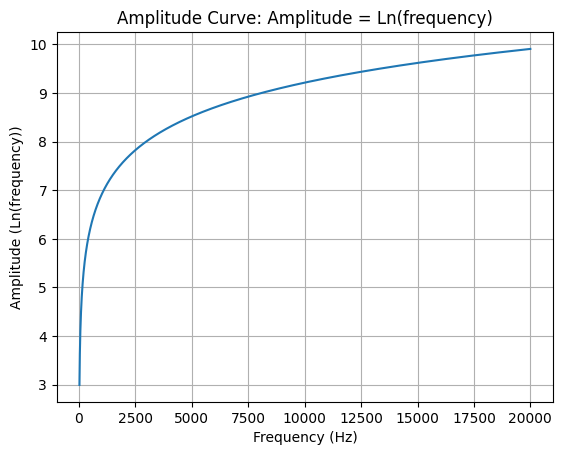

In [1]:
import math
import matplotlib.pyplot as plt

frequency_range = range(20, 20001)
amplitude_curve = [math.log(frequency) for frequency in frequency_range]

plt.plot(list(frequency_range), amplitude_curve)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (Ln(frequency))')
plt.title('Amplitude Curve: Amplitude = Ln(frequency)')
plt.grid(True)
plt.show()


In [2]:
import os

# folder path
dir_path = '../audio/RS500/'

# list to store files
tracks = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        tracks.append(path)

for t in tracks:
    if t == '.DS_Store':
        tracks.remove(t)
        
tracks.sort()
print(len(tracks))

500


In [8]:
all_taggram_RollingStones = []
all_features_RollingStones = []
path = '../audio/RS500/'

for t in tracks:
    song = path + t
    print('Working with song: ', song)
    taggram, tags, features = extractor(song, model='MTT_musicnn', extract_features=True)
    all_taggram_RollingStones.append(taggram)
    all_features_RollingStones.append(features)

Working with song:  ../audio/RS500/01 - Bob Dylan - Like A Rolling Stone.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Working with song:  ../audio/RS500/02 - Rolling Stones - (I Can't Get No) Satisfaction.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Working with song:  ../audio/RS500/03 - John Lennon - Imagine.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Working with song:  ../audio/RS500/04 - Marvin Gaye - Whats Going On.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Working with song:  ../audio/RS500/05 - Aretha Franklin - Respect.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Working with song:  ../audio/RS500/06 - The Beach Boys - Good Vibrations.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. done!
Working with song:  ../audio/RS500/07 - Chuck Berry - Johnny B. Goode.mp3
Computing spectrogram (w/ librosa) and tags (w/ tensorflow).. do

/opt/conda/envs/myenv/lib/python3.6/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


NoBackendError: 

In [ ]:
print(len(all_features_RollingStones))


In [ ]:
np.save('../data/all_taggram_RollingStones.npy', all_taggram_RollingStones)

In [ ]:
np.save('../data/all_features_RollingStones.npy', all_features_RollingStones)

In [ ]:
np.save('../data/titles_rollingStone.npy', tracks)

In [ ]:
penultimate = all_features_RollingStones[0]['penultimate']
print(penultimate.shape)

In [16]:
import os

def getTracks(dir_path):
    # list to store files
    # list to store files
    tracks = []

    # Iterate directory
    for path in os.listdir(dir_path):
        # check if current path is a file
        if os.path.isfile(os.path.join(dir_path, path)):
            tracks.append(path)

    for t in tracks:
        if t == '.DS_Store':
            tracks.remove(t)
            
    tracks.sort()
    print(len(tracks))
    return tracks

In [12]:
#Duration of Samples

# folder path
dir_RS500_path = '../audio/RS500/'
tracks_RS500 = getTracks(dir_RS500_path)

dir_Boomy500_path = '../audio/Boomy500/'
tracks_Boomy500 = getTracks(dir_Boomy500_path)

RS500_Durations = []
Boomy500_Durations = []

path_RS500 = '../audio/RS500/'
path_Boomy500 = '../audio/Boomy500/'

for t in tracks_RS500:
    song = dir_RS500_path + t
    print('Working with song: ', song)
    duration = librosa.get_duration(filename=song)
    RS500_Durations.append(duration)
    
for t in tracks_Boomy500: 
    song = dir_Boomy500_path + t
    print('Working with song: ', song)
    duration = librosa.get_duration(filename=song)
    Boomy500_Durations.append(duration)

500
500
Working with song:  ../audio/RS500/01 - Bob Dylan - Like A Rolling Stone.mp3
Working with song:  ../audio/RS500/02 - Rolling Stones - (I Can't Get No) Satisfaction.mp3
Working with song:  ../audio/RS500/03 - John Lennon - Imagine.mp3
Working with song:  ../audio/RS500/04 - Marvin Gaye - Whats Going On.mp3
Working with song:  ../audio/RS500/05 - Aretha Franklin - Respect.mp3
Working with song:  ../audio/RS500/06 - The Beach Boys - Good Vibrations.mp3
Working with song:  ../audio/RS500/07 - Chuck Berry - Johnny B. Goode.mp3
Working with song:  ../audio/RS500/08 - The Beatles - Hey Jude.mp3
Working with song:  ../audio/RS500/09 - Nirvana - Smells Like Teen Spirit.mp3
Working with song:  ../audio/RS500/10 - Ray Charles - What'd I Say Parts I & Ii.mp3
Working with song:  ../audio/RS500/100 - The Rolling Stones - You Can't Always Get What You Want.mp3
Working with song:  ../audio/RS500/101 - The Jimi Hendrix Experience - Voodoo Child (Slight Return).mp3
Working with song:  ../audio/R

In [17]:
def getTimes(seconds):
    minutes, seconds = divmod(seconds, 60)
    hours, minutes = divmod(minutes, 60)
    return hours, minutes, seconds 

In [20]:
print(len(RS500_Durations), len(Boomy500_Durations))
print(RS500_Durations[0], Boomy500_Durations[0])

RS500_Durations = np.array(RS500_Durations)
Boomy500_Durations = np.array(Boomy500_Durations)

total_RS500 = np.sum(RS500_Durations)
total_Boomy500 = np.sum(Boomy500_Durations)

print(total_RS500, total_Boomy500)

minutesRS500, secondsRS500 = divmod(total_RS500, 60)
hoursRS500, minutesRS500 = divmod(minutesRS500, 60)

print("%d:%02d:%02d" % (hoursRS500, minutesRS500, secondsRS500))
#14h49m


minutesBoomy500, secondsBoomy500 = divmod(total_Boomy500, 60)
hoursBoomy500, minutesBoomy500 = divmod(minutesBoomy500, 60)

print("%d:%02d:%02d" % (hoursBoomy500, minutesBoomy500, secondsBoomy500))

mean_RS500 = np.mean(RS500_Durations)
mean_Boomy500 = np.mean(Boomy500_Durations)

std_RS500 = np.std(RS500_Durations)
std_Boomy500 = np.std(Boomy500_Durations)

print(mean_RS500, std_RS500, mean_Boomy500, std_Boomy500)

hoursRS, minutesRS, secondsRS = getTimes(mean_RS500) 
hours_stdRS, minutes_stdRS, seconds_stdRS = getTimes(std_RS500)

print("%d:%02d:%02d" % (hoursRS, minutesRS, secondsRS), "%d:%02d:%02d" % (hours_stdRS, minutes_stdRS, seconds_stdRS))

hoursBM, minutesBM, secondsBM = getTimes(mean_Boomy500)
hours_stdBM, minutes_stdBM, seconds_stdBM = getTimes(std_Boomy500)

print("%d:%02d:%02d" % (hoursBM, minutesBM, secondsBM), "%d:%02d:%02d" % (hours_stdBM, minutes_stdBM, seconds_stdBM))

#print("%d:%02d:%02d" % (meanhoursBoomy500, meanminutesBoomy500, meansecondsBoomy500))

500 500
374.7130385487528 117.14956916099773
112195.44892020975 53322.36784580499
31:09:55
14:48:42
224.39089784041948 87.29442327728916 106.64473569160998 32.24412336715456
0:03:44 0:01:27
0:01:46 0:00:32


[[Text(0, 0, 'RS500'), Text(1, 0, 'Boomy500')]]

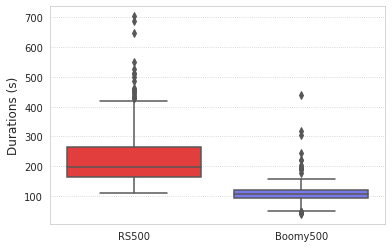

In [22]:
import numpy as np
import seaborn as sns


all_arr = [RS500_Durations, Boomy500_Durations]
sns.set_style("whitegrid", {'grid.linestyle': ':'})
g = sns.boxplot(data=all_arr, palette=["#ff2222", "#6666ff"])

#g = sns.distplot(RS500_Durations, kde_kws={"shade": True}, bins=50)
#g = sns.distplot(Boomy500_Durations, kde_kws={"shade": True}, bins=50)

g.set(xlabel='', ylabel='Seconds')

plt.ylabel('Durations (s)', fontsize=12);
#plt.title('Durations', fontsize=20)

g.set(xticklabels=['RS500', 'Boomy500'])


In [23]:
%matplotlib inline
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec

def depict_features(features, coordinates, title, aspect='auto', xlabel=True, fontsize=13):
    # plot features in coordinates
    ax = plt.subplot(coordinates) 
    plt.imshow(features.T, interpolation=None, aspect=aspect)
    # set title
    ax.title.set_text(title + ' (' + str(features.shape[1]) + ')' )
    ax.title.set_fontsize(fontsize)
    # y-axis
    ax.get_yaxis().set_visible(False)
    # x-axis
    x_label = np.arange(0, features.shape[0], features.shape[0]//5)
    ax.set_xticks(x_label)
    ax.set_xticklabels(x_label, fontsize=fontsize)
    if xlabel:
        ax.set_xlabel('(time frames)', fontsize=fontsize)



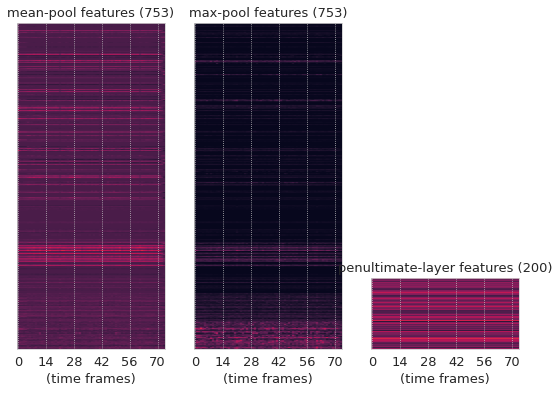

In [24]:
plt.rcParams["figure.figsize"] = (9,6)
gs = gridspec.GridSpec(4, 3) # create a figure having 1 rows and 3 cols.
depict_features(features=all_features_RollingStones[1]['mean_pool'],
                coordinates=gs[:, 0],
                title='mean-pool features')

depict_features(features=all_features_RollingStones[1]['max_pool'],
                coordinates=gs[:, 1],
                title='max-pool features')
depict_features(features=all_features_RollingStones[1]['penultimate'],
                coordinates=gs[3, 2],
                title='penultimate-layer features')

In [127]:
rollingStone = np.load('../data/all_taggram_RollingStones.npy', allow_pickle=True)
boomy = np.load('../data/all_taggram.npy', allow_pickle=True)

In [128]:
rollingStone_flat = []
for song in rollingStone:
    arr1 = np.mean(song, axis=0)
    result = arr1.reshape(1, -1)
    #print(result.shape)
    rollingStone_flat.append(result)

rollingStone_flat = np.array(rollingStone_flat, dtype=np.float32)

rollingStone_flat = rollingStone_flat.reshape(500, 50)

In [72]:
#rollingStone_flat = rollingStone_flat.sum(axis=0)
#rollingStone_flat = rollingStone_flat.reshape(1, -1)
#print(rollingStone_flat.shape)

(1, 50)


['Galvji', 'Heiti TC', 'Iowan Old Style', 'Bangla MN', 'Mishafi Gold', 'Kohinoor Bangla', 'Noto Sans Buginese', 'cmmi10', '.Keyboard', 'Noto Sans Kaithi', 'Noto Nastaliq Urdu', 'Noto Sans Yi', 'Noto Sans Khudawadi', 'Noto Sans Bassa Vah', 'Al Bayan', 'Waseem', '.SF Compact', 'Noto Sans Old Permic', 'Noto Sans Tagalog', 'Plantagenet Cherokee', 'Georgia', 'Sana', 'Noto Sans Buhid', 'Noto Serif Balinese', 'Wingdings 3', '.SF Compact Rounded', 'STIXGeneral', 'ITF Devanagari', 'Songti SC', 'Optima', 'Comic Sans MS', 'Noto Sans Duployan', '.SF Arabic', 'Kannada Sangam MN', 'Noto Sans Old Hungarian', 'Oriya Sangam MN', 'Monaco', 'Verdana', 'Bradley Hand', 'Noto Sans Glagolitic', 'Noto Sans Osage', 'Seravek', 'Noto Sans Mende Kikakui', 'Noto Sans Meetei Mayek', 'Marker Felt', 'Noto Sans Bhaiksuki', 'Noto Sans Tirhuta', 'Chalkduster', 'Bodoni Ornaments', 'Brush Script MT', 'Oriya MN', 'Telugu Sangam MN', 'Noto Sans NKo', 'Kokonor', 'Microsoft Sans Serif', 'Arial Black', 'Noto Sans Pau Cin Hau',

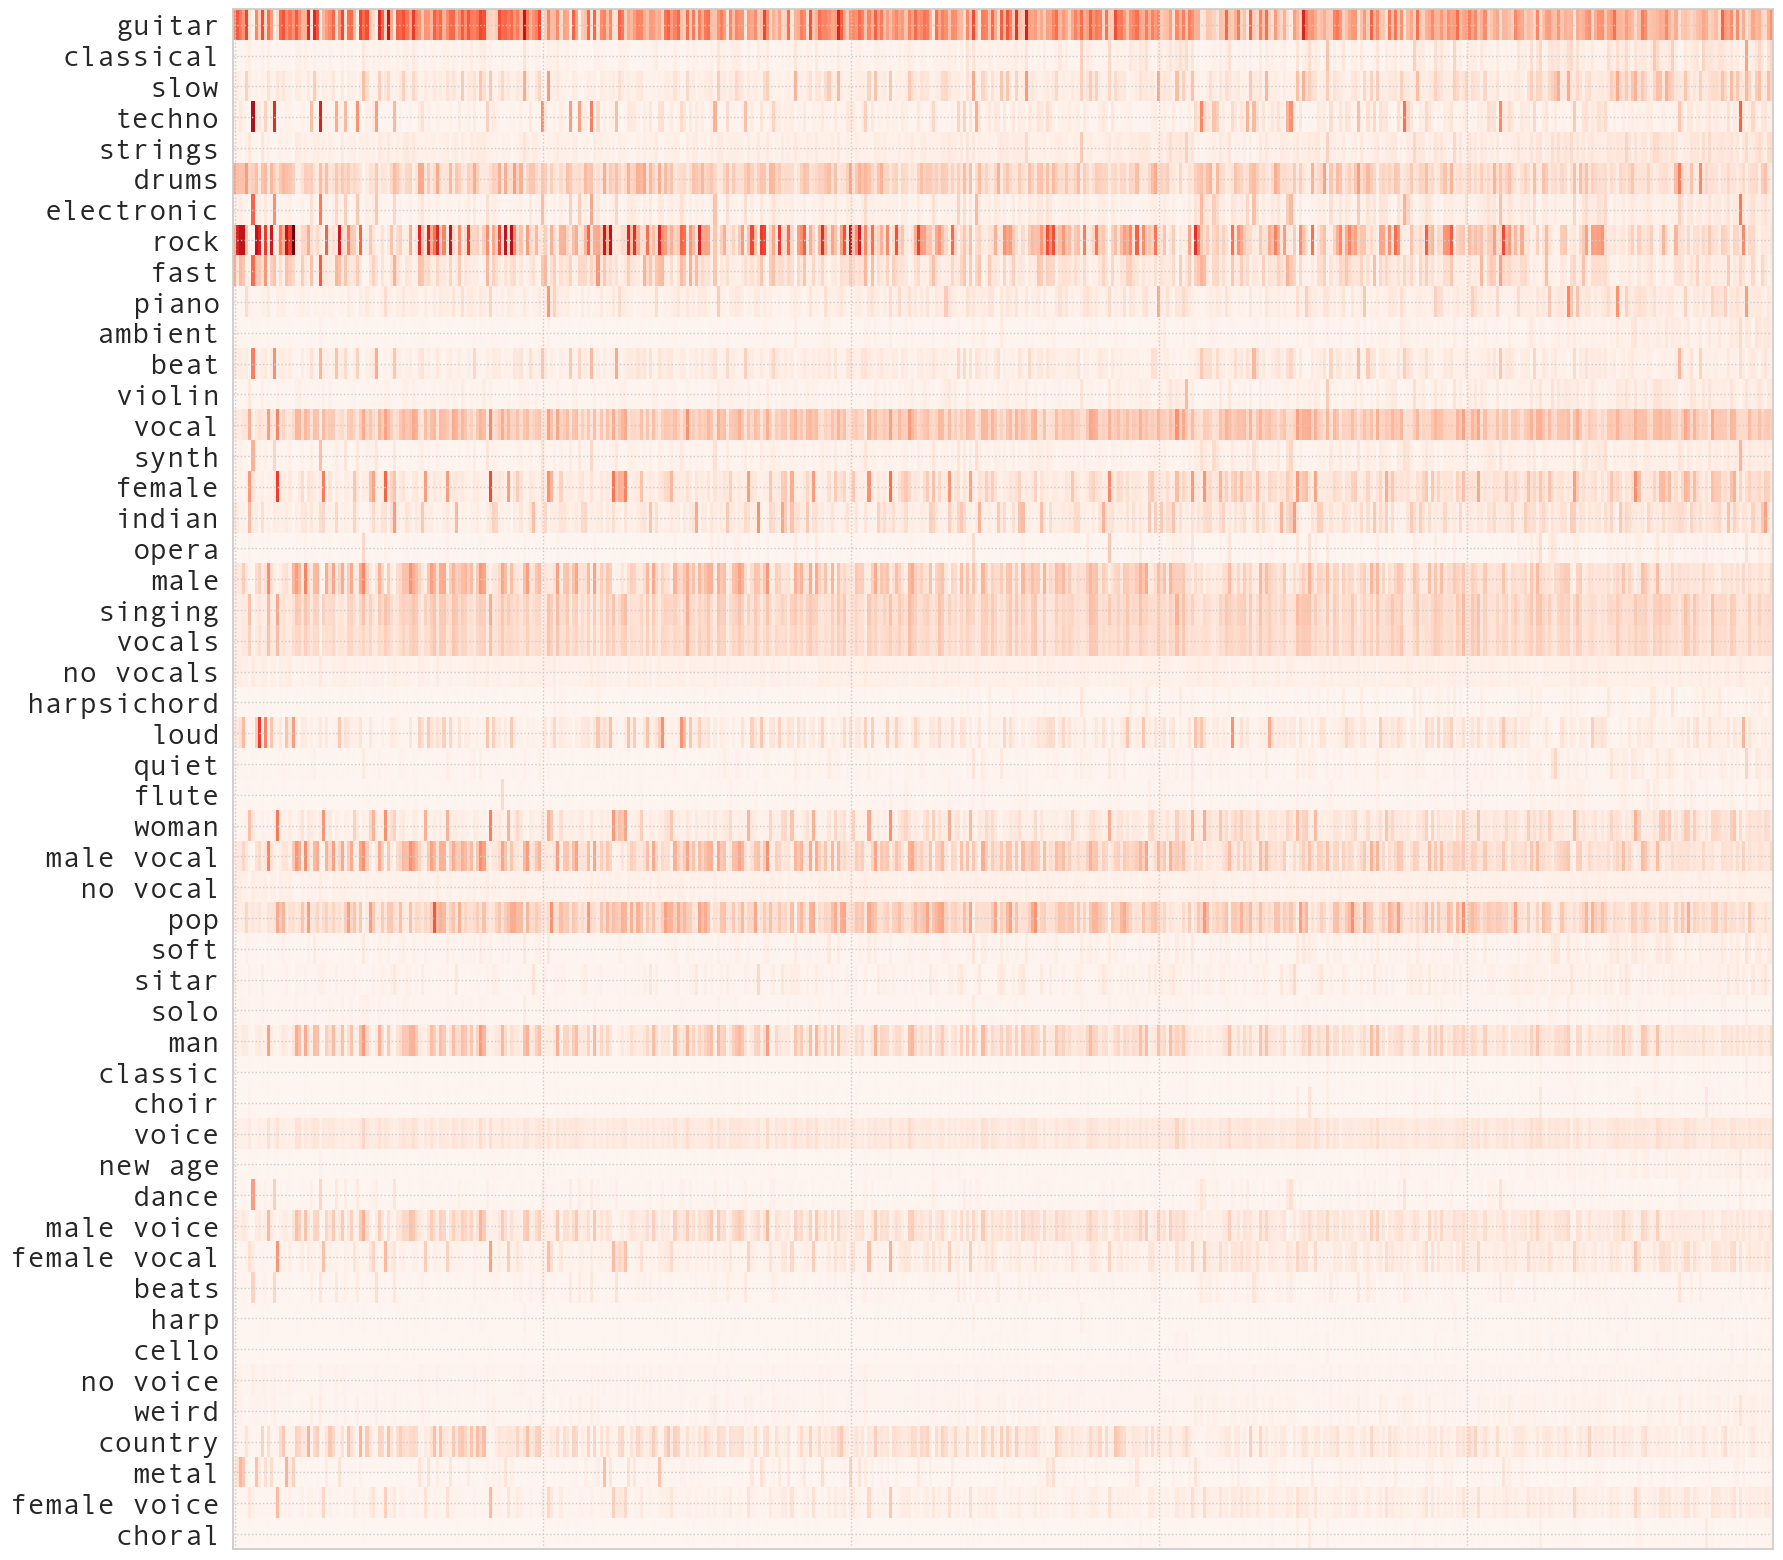

In [133]:
from matplotlib.font_manager import get_font_names

print(get_font_names())

tags = np.load('../data/tags.npy', allow_pickle=True)
in_length = 1 # seconds -- by default, the model takes inputs of 3 seconds with no overlap
id = 69
print(tracks[id])
data = rollingStone_flat

cumsum_scores = {}
# iterate over all song
for i in range(0,500):
    col = data[i]
    #print(col)
    col = np.sort(col)
    #print(col)
    cumsum = np.cumsum(col)
    idx=np.where(cumsum>0.9)[0][0]
    cumsum_scores[i] = idx

indices = sorted(cumsum_scores, key=cumsum_scores.get, reverse=True)
data = data[indices]

print(data.shape)

# depict taggram
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.family'] = 'Andale Mono'
fontsize=22
fig, ax = plt.subplots()
ax.imshow(data.T, aspect=10.0, cmap='Reds')

# title
# ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
#ax.set_xlabel('(Average over time all 500 Rolling Stone playlist)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(data.shape[0])
x_label = np.arange(in_length/2, in_length*data.shape[0], 3)
#x.set_xticks(x_pos)
ax.set_xticklabels('', fontsize=fontsize)
# plt.grid()
plt.show()

In [134]:
boomy_flat = []
for song in boomy:
    arr1 = np.mean(song, axis=0)
    result = arr1.reshape(1, -1)
    #print(result.shape)
    boomy_flat.append(result)

boomy_flat = np.array(boomy_flat, dtype=np.float32)

boomy_flat = boomy_flat.reshape(500, 50)

(500, 50)
(500, 50)


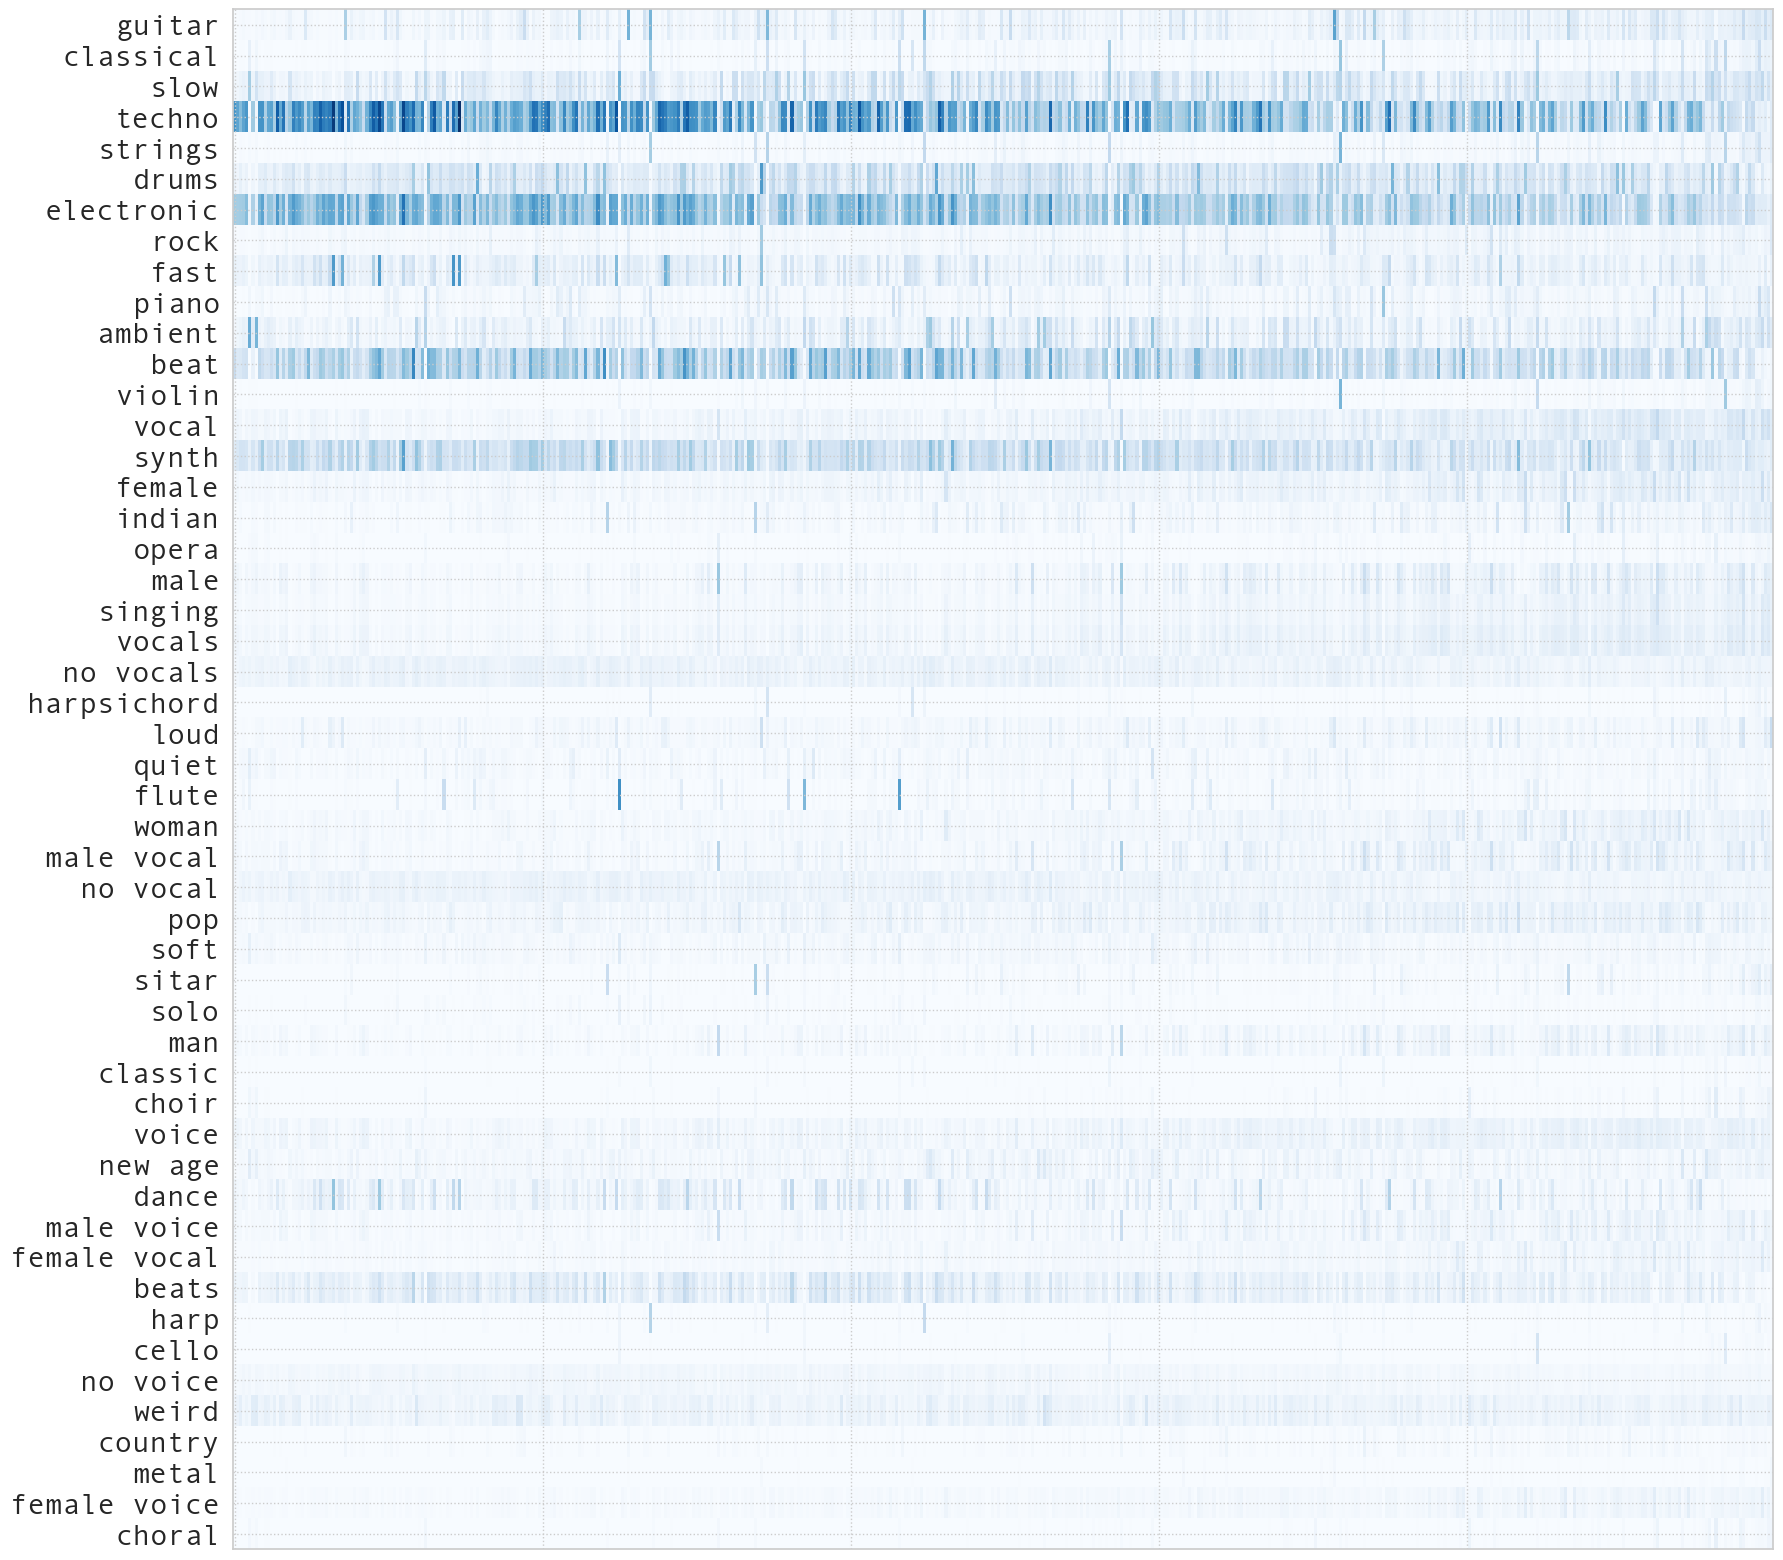

In [135]:
import seaborn as sns

tags = np.load('../data/tags.npy', allow_pickle=True)
in_length = 1 # seconds -- by default, the model takes inputs of 3 seconds with no overlap

data = boomy_flat

print(data.shape)

cumsum_scores = {}
# iterate over all song
for i in range(0,500):
    col = data[i]
    #print(col)
    col = np.sort(col)
    #print(col)
    cumsum = np.cumsum(col)
    idx=np.where(cumsum>0.9)[0][0]
    cumsum_scores[i] = idx

indices = sorted(cumsum_scores, key=cumsum_scores.get, reverse=True)
data = data[indices]

print(data.shape)


# depict taggram
plt.rcParams["figure.figsize"] = (20,20)
plt.rcParams['font.family'] = 'Andale Mono'
fontsize=22
fig, ax = plt.subplots()
ax.imshow(data.T, aspect=10.0, cmap='Blues')

# title
# ax.title.set_text('Taggram')
ax.title.set_fontsize(fontsize)

# x-axis title
#ax.set_xlabel('(Average over time all 500 Boomy playlist)', fontsize=fontsize)

# y-axis
y_pos = np.arange(len(tags))
ax.set_yticks(y_pos)
ax.set_yticklabels(tags, fontsize=fontsize-1)

# x-axis
x_pos = np.arange(data.shape[0])
x_label = np.arange(in_length/2, in_length*data.shape[0], 3)
#x.set_xticks(x_pos)
ax.set_xticklabels('', fontsize=fontsize)
# plt.grid()
plt.show()

In [ ]:


penultimate_array_rollingStones = []

for data in all_features_RollingStones:
    penultimate = data['penultimate']
    #print(penultimate.shape)
    arr1 = np.mean(penultimate, axis=0)
    arr2 = np.array(penultimate).std(0)

    result = np.concatenate((arr1, arr2), axis=0)
    result = result.reshape(1, -1)
    penultimate_array_rollingStones.append(result)

penultimate_array = np.array(penultimate_array_rollingStones)

print(penultimate_array[3].shape)


In [ ]:
print(penultimate_array_rollingStones)

In [ ]:
np.save('../data/penultimate_array_rollingStones.npy', penultimate_array_rollingStones)

In [ ]:
offset = 0
# duration: only load up to this much audio (in seconds)
duration = 50

## chromagram
# sr: sampling rate
sr = 44100
# hop_length: number of samples between successive chroma frames (frame size)
hop_length = 4096

## chordgram
# w: filter size; w = 30 to be a good comromise that works well for most songs
w = 30

In [ ]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)

# Beat track on the percussive signal
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
print('Estimated tempo: {:.2f} beats per minute'.format(tempo))



In [ ]:
all_bpms_rolling_stone = []
path = '../audio/500_Greatest_Songs/'

for trak in tracks:
    song = path + trak
    y, sr = librosa.load(song)
    # Separate harmonics and percussives into two waveforms
    y_harmonic, y_percussive = librosa.effects.hpss(y)

    # Beat track on the percussive signal
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
    all_bpms_rolling_stone.append(tempo)
    

print('Estimated tempo: {:.2f} beats per minute'.format(all_bpms_rolling_stone[0]))
    

In [ ]:
np.save('../data/all_bpms_rolling_stone.npy', all_bpms_rolling_stone)

In [ ]:
all_tonnetz = []
all_chorma = []
path = '../audio/500/'
for trak in tracks:
    song = path + trak
    y, sr = librosa.load(song)
    # Separate tonnetz
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
    all_tonnetz.append(tonnetz)
    all_chorma.append(chroma)


In [ ]:
print(all_tonnetz[3].shape)

In [ ]:

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y, sr=sr), y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='Chroma')
fig.colorbar(img1, ax=[ax[0]])
fig.colorbar(img2, ax=[ax[1]])

In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr, n_chroma=12, n_fft=hop_length)
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

In [ ]:
import librosa.display
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time', ax=ax[0])
ax[0].set(title='chroma_stft')
ax[0].label_outer()
img = librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time', ax=ax[1])
ax[1].set(title='chroma_cqt')
fig.colorbar(img, ax=ax)

In [22]:
song = '../audio/500/AI Music - boomy.mp3'
y, sr = librosa.load(song)
y = librosa.effects.harmonic(y)
# Separate tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

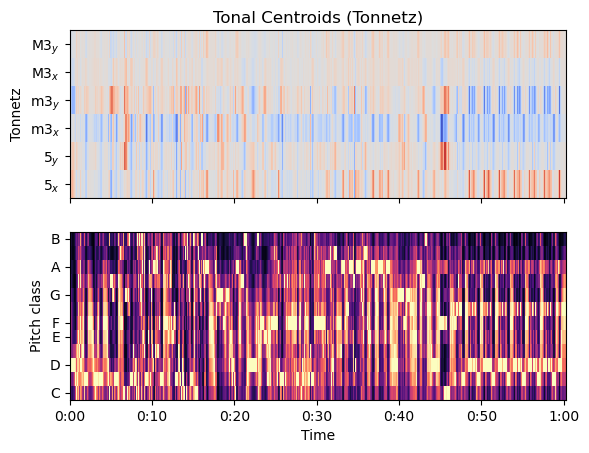

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time', ax=ax[0])
ax[0].set(title='Tonal Centroids (Tonnetz)')
ax[0].label_outer()
img2 = librosa.display.specshow(librosa.feature.chroma_cqt(y=y, sr=sr), y_axis='chroma', x_axis='time', ax=ax[1])

In [147]:
# Create templates for major, minor, and no-chord qualities
maj_template = np.array([1,0,0, 0,1,0, 0,1,0, 0,0,0])
min_template = np.array([1,0,0, 1,0,0, 0,1,0, 0,0,0])
N_template   = np.array([1,1,1, 1,1,1, 1,1,1, 1,1,1.]) / 4.
# Generate the weighting matrix that maps chroma to labels
weights = np.zeros((25, 12), dtype=float)
labels = ['C:maj', 'C#:maj', 'D:maj', 'D#:maj', 'E:maj', 'F:maj',
          'F#:maj', 'G:maj', 'G#:maj', 'A:maj', 'A#:maj', 'B:maj',
          'C:min', 'C#:min', 'D:min', 'D#:min', 'E:min', 'F:min',
          'F#:min', 'G:min', 'G#:min', 'A:min', 'A#:min', 'B:min',
          'N']
for c in range(12):
    weights[c, :] = np.roll(maj_template, c) # c:maj
    weights[c + 12, :] = np.roll(min_template, c)  # c:min
weights[-1] = N_template  # the last row is the no-chord class
# Make a self-loop transition matrix over 25 states
trans = librosa.sequence.transition_loop(25, 0.9) 

In [148]:
song = '../audio/RS500/410 - The Pixies - Monkey Gone To Heaven.mp3'

y, sr = librosa.load(song)

# Suppress percussive elements
y = librosa.effects.harmonic(y, margin=4)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
# Map chroma (observations) to class (state) likelihoods
probs = np.exp(weights.dot(chroma))  # P[class | chroma] ~= exp(template' chroma)
probs /= probs.sum(axis=0, keepdims=True)  # probabilities must sum to 1 in each column
# Compute independent frame-wise estimates
chords_ind = np.argmax(probs, axis=0)
# And viterbi estimates
chords_vit = librosa.sequence.viterbi_discriminative(probs, trans)

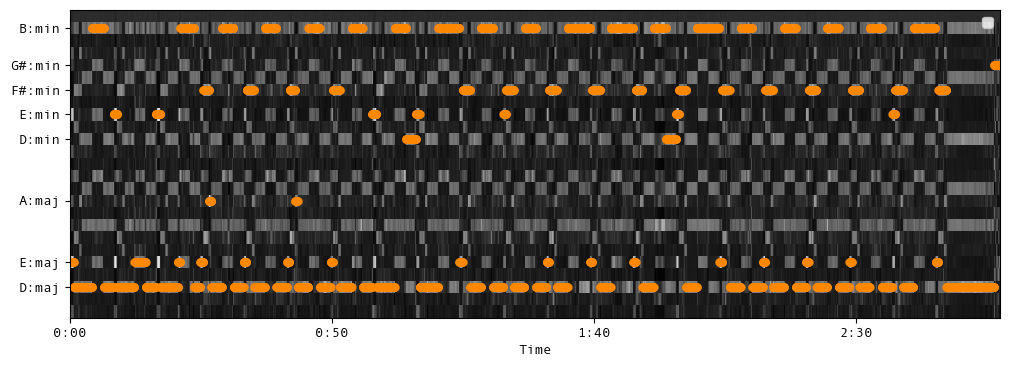

In [152]:
# And plot the results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (12,4)
plt.rcParams['font.family'] = 'Andale Mono'
fontsize=20
librosa.display.specshow(probs, x_axis='time', cmap='gray', ax=ax)
times = librosa.times_like(chords_vit)
ax.scatter(times, chords_vit, color='#ff8800', alpha=0.99, marker='o', s=25)
ax.set(yticks=np.unique(chords_vit), yticklabels=[labels[i] for i in np.unique(chords_vit)])
ax.legend()

In [153]:
frec = {}
for c in chords_vit:
    chord = labels[c]
    frec[chord] = frec.get(chord, 0)+1
frec = sorted(frec.items(), key = lambda kv: -kv[1])

In [154]:
print(frec)

[('D:maj', 3538), ('B:min', 2267), ('F#:min', 968), ('E:maj', 419), ('E:min', 197), ('D:min', 164), ('G#:min', 48), ('A:maj', 39)]
